<a href="https://colab.research.google.com/github/hereagain-Y/AMR_project/blob/main/VAE_add_Validationv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from six.moves import xrange

Load CDR3 Data

In [2]:
s = []
my_file = open("/content/drive/My Drive/DL/VAE/NormalCDR3.txt", "r")
content_list = my_file.read().splitlines()
content_list=np.array(content_list)
print(content_list)


['CASSLKPNTEAFF' 'CASSAHIANYGYTF' 'CASSPRPNTEAFF' ... 'CASSVDVGYEQYF'
 'CASRLAGQETQYF' 'CASSVVPNTEAFF']


Load AA index data

In [ ]:
d= {} # bipphysics dictionary
with open("/content/drive/My Drive/DL/VAE/AAidx_PCA.txt") as f:
    next(f)
    for line in f.readlines():
        line=line.strip().split('\t') #
        AA=line[0]
        tag=0
        values=[]
        for PC in line[1:]:
            values.append(float(PC))
        if tag==1: 
            continue
        d[AA]=values
d # AA


# normalization 

In [ ]:
max(d['A'])
type(d['A'])

list

In [4]:
 
 #return 0 -1 (xi – min(x)) / (max(x) – min(x))

def normalize(d):
  result = {}
  for key, value in d.items():
    maxval = max(d[key])
    minval = min(d[key])
    newval=[]
    for number in value:

      newval.append((number-minval)/(maxval-minval))
    
    result[key] =newval
  return(result)
    



In [6]:

d_norm=normalize(d)
d_norm

{'A': [0.07525231330089575,
  0.11110993247250554,
  1.0,
  0.10085171430385075,
  0.3362586030378956,
  0.08589557098930195,
  0.3166716257763159,
  0.07845695355133557,
  0.29558950944630463,
  0.0,
  0.17264524667274148,
  0.02519795885608285,
  0.21399362066317887,
  0.20352855444366297,
  0.315091708147771],
 'C': [0.0,
  0.7495696809258403,
  0.07865597242639141,
  1.0,
  0.7627030301724574,
  0.8168259804237982,
  0.4333259554067372,
  0.16777058828085453,
  0.33203232126086285,
  0.5724424696175718,
  0.4816359939467978,
  0.39170914029908754,
  0.4294503690415155,
  0.37686420256824266,
  0.3449489815613006],
 'D': [1.0,
  0.25640988772162693,
  0.32592183369372396,
  0.4200305281353341,
  0.5744582792254195,
  0.1560420670881465,
  0.0,
  0.3091207506859722,
  0.258039340323857,
  0.2882727977487466,
  0.3895335207450628,
  0.38763175831637187,
  0.18676139620557258,
  0.5451097643479257,
  0.2696370438467982],
 'E': [1.0,
  0.0,
  0.8519057393700852,
  0.4383574918534277,
  

In [7]:
# max length
#comp_seq=data["amino_acid"].tolist()

comp_seq=content_list
print(comp_seq)
max_len=-1 

for AA in comp_seq:
    if len(AA)>max_len:
        max_len=len(AA)
        #res=AA
print(max_len )

['CASSLKPNTEAFF' 'CASSAHIANYGYTF' 'CASSPRPNTEAFF' ... 'CASSVDVGYEQYF'
 'CASRLAGQETQYF' 'CASSVVPNTEAFF']
19


In [8]:
PC_length=len(d_norm['C'])
def AAindexEncoding(Seq):
    length_seq=len(Seq)
    global max_len
    AAE=np.zeros([max_len,15])
    if length_seq<max_len:
        for amino in range(length_seq):
            AA=Seq[amino]# 
            AAE[amino,]=d_norm[AA] # add PC value 
            
        for amino in range(length_seq,max_len):
            AAE[amino,]=np.zeros(15)
    else: 
        for amino in range(length_seq): # zero padding
            AA=Seq[amino]# 
            AAE[amino,]=d_norm[AA]
        
    #AAE=np.transpose(AAE.astype(np.float32)) # row as PC. and column as AA sequence 
    return AAE 
  
def GetFeatures(file):
    #sequence=file['amino_acid'].tolist()
    #sequence=np.array(sequence)
    #sequence = file.read().splitlines()
    #sequence=np.array(sequence)
    hot_encode=[]
    for seq in file:
        hot_encode.append(AAindexEncoding(seq))
    hot_encode=np.array(hot_encode)
    result=np.array(hot_encode)
    return(result) # dimension: number of sequence [15*length(sequence)]


r1=GetFeatures(content_list)

In [ ]:
r1[1]

array([[0.        , 0.74956968, 0.07865597, 1.        , 0.76270303,
        0.81682598, 0.43332596, 0.16777059, 0.33203232, 0.57244247,
        0.48163599, 0.39170914, 0.42945037, 0.3768642 , 0.34494898],
       [0.07525231, 0.11110993, 1.        , 0.10085171, 0.3362586 ,
        0.08589557, 0.31667163, 0.07845695, 0.29558951, 0.        ,
        0.17264525, 0.02519796, 0.21399362, 0.20352855, 0.31509171],
       [1.        , 0.66292414, 0.39714219, 0.44204089, 0.        ,
        0.35348655, 0.10502056, 0.42085545, 0.62079963, 0.13490124,
        0.24598842, 0.27386045, 0.28816463, 0.27269622, 0.27479255],
       [1.        , 0.66292414, 0.39714219, 0.44204089, 0.        ,
        0.35348655, 0.10502056, 0.42085545, 0.62079963, 0.13490124,
        0.24598842, 0.27386045, 0.28816463, 0.27269622, 0.27479255],
       [0.07525231, 0.11110993, 1.        , 0.10085171, 0.3362586 ,
        0.08589557, 0.31667163, 0.07845695, 0.29558951, 0.        ,
        0.17264525, 0.02519796, 0.21399362, 

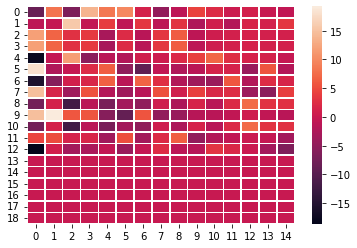

In [9]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

In [10]:
# transform 
kwargs = {'num_workers': 1, 'pin_memory': True} 
r1_transform=torch.from_numpy(r1) # from np to tensor
r1_transform=r1_transform.float()
r1_transform.shape
r1_mean = torch.mean(r1_transform)
r1_std = torch.std(r1_transform)
r1_var =  torch.var(r1_transform)
print("mean, std, var of tensor:\n", r1_mean, r1_std, r1_var)

# normalization 
r1_transform = (r1_transform-r1_mean)/r1_var
#train_ds, test_ds = torch.utils.data.random_split(r2_transform, (30000, 10000))
train_ds, test_ds =torch.utils.data.random_split(r1_transform, (int(0.8*len(r1_transform)), len(r1_transform)-int(0.8*len(r1_transform))))
print(train_ds, test_ds)

train_loader = DataLoader(dataset=train_ds, batch_size=1000)
test_loader  = DataLoader(dataset=test_ds,  batch_size=1000)



mean, std, var of tensor:
 tensor(0.3385) tensor(0.3204) tensor(0.1027)
<torch.utils.data.dataset.Subset object at 0x7fd57d44ded0> <torch.utils.data.dataset.Subset object at 0x7fd57d44dc10>


In [11]:
# set paramters:
cuda = True
DEVICE = torch.device("cuda" if cuda else "cpu")


batch_size = 1000

x_dim=285 # 19*15
hidden_dim = 256
hidden_dim2 = 128

latent_dim = 64

lr = 1e-3

epochs = 200

In [12]:
class Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim,hidden_dim2, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_input3 = nn.Linear(hidden_dim, hidden_dim2)
        self.FC_mean  = nn.Linear(hidden_dim2, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim2, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        h_       = self.LeakyReLU(self.FC_input3(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance 
                                                       #             (i.e., parateters of simple tractable normal distribution "q"
        
        return mean, log_var

In [13]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim,hidden_dim2, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim2)
        self.FC_hidden3 = nn.Linear(hidden_dim2, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden3(h))
        h     = self.LeakyReLU(self.FC_hidden2(h))
        
        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

In [14]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)        # sampling epsilon        
        z = mean + var*epsilon                          # reparameterization trick
        return z
        
                
    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var) ]
        x_hat            = self.Decoder(z)
        
        return x_hat, mean, log_var

In [15]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, hidden_dim2=hidden_dim2, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, hidden_dim2=hidden_dim2,output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)

In [18]:
from torch.optim import Adam

BCE_loss = nn.BCELoss()

def loss_function(x, x_hat, mean, log_var):
    #reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    # try MSE 
    MSELoss_criterion = nn.MSELoss()
    reproduction_loss = MSELoss_criterion(x_hat, x) 
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(model.parameters(), lr=lr)

In [70]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    overall_testloss= 0
    train_loss= []
    testtoal_loss= []
    for batch_idx, x in enumerate(train_loader):
        x = x.view(len(x), x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        overall_loss += loss.item()
        train_loss.append(loss.item())
        
        loss.backward()
       
        optimizer.step()
      #test loss
    for batch_idx, x in enumerate(test_loader):
        x = x.view(len(x), x_dim)
        x = x.to(DEVICE)

        #optimizer.zero_grad()

        pred, mean, log_var = model(x)
        test_loss = loss_function(x, pred, mean, log_var)
        overall_testloss += test_loss.item()
        testtoal_loss.append(test_loss.item())

    if (epoch % 10 == 0):
      #print('====> Epoch %d done! Average Loss:  = %.2e, Average test loss = %.2e' % (epoch,overall_loss / (batch_idx*batch_size),overall_testloss/(batch_idx*batch_size)))
        
        
      print("\tEpoch", epoch , "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size),
        "\tAverage Test Loss: " , overall_testloss/(batch_idx*batch_size))
    
print("Finish!!")

Start training VAE...
	Epoch 0 complete! 	Average Loss:  0.038668827738080704 	Average Test Loss:  0.009659789766584125
	Epoch 10 complete! 	Average Loss:  0.03866885621207101 	Average Test Loss:  0.009659857204982213
	Epoch 20 complete! 	Average Loss:  0.0386688631602696 	Average Test Loss:  0.00965983281816755
	Epoch 30 complete! 	Average Loss:  0.03866884068080357 	Average Test Loss:  0.009659841673714774
	Epoch 40 complete! 	Average Loss:  0.03866876207079206 	Average Test Loss:  0.00965985529763358
	Epoch 50 complete! 	Average Loss:  0.03866875539507185 	Average Test Loss:  0.009659863471984864
	Epoch 60 complete! 	Average Loss:  0.03866892487662179 	Average Test Loss:  0.009659822055271694
	Epoch 70 complete! 	Average Loss:  0.038668861389160154 	Average Test Loss:  0.009659832409449986
	Epoch 80 complete! 	Average Loss:  0.03866883441380092 	Average Test Loss:  0.00965983213697161
	Epoch 90 complete! 	Average Loss:  0.03866884204319545 	Average Test Loss:  0.009659814834594726
	

In [20]:


#save model
torch.save(model, '/content/drive/My Drive/DL/VAE/VAE_modify_model_2000_echo.apx')

model = torch.load('/content/drive/My Drive/DL/VAE/VAE_modify_model_2000_echo.apx')

In [21]:
# load model. 

my_file2 = open("/content/drive/My Drive/DL/VAE/TumorCDR3.txt", "r")
content_list2 = my_file2.read().splitlines()

#content_list2=np.array(content_list2)

neww=[x for x in content_list2 if len(x)<=19]


neww=np.array(neww)


r2=GetFeatures(neww)

r2.shape

(29695, 19, 15)

numpy.ndarray

In [42]:
#

# normalization 
#r2_transform = (r2_transform-r2_mean)/r2_var
#r2_transform.shape
#result = model(r2_transform)
#m2 = r2.view(len(r2), 285)
r2_transform=torch.from_numpy(r2).float() # change to tensor and float 
m2=r2_transform.view(len(r2_transform),285) # flatten 
result = model(m2.cuda())[0] # 

result2=result.cpu().view( len(result),19,15 ).detach().numpy()


In [43]:
result2.shape

(29695, 19, 15)

In [47]:

r2_transform.shape

torch.Size([29695, 19, 15])

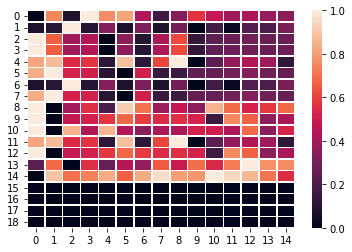

In [48]:
# show. figure 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

fig1 = r2_transform.cpu()[4] # move to cpu first 
ax = sns.heatmap(fig1, linewidth=0.5)
plt.show()



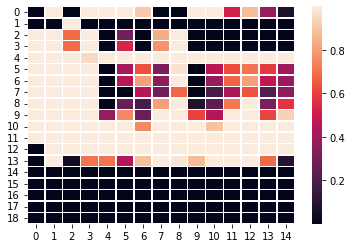

In [59]:
# for result data
# move to cpu first 
ax = sns.heatmap(data=result2[4], linewidth=0.5)
plt.show()

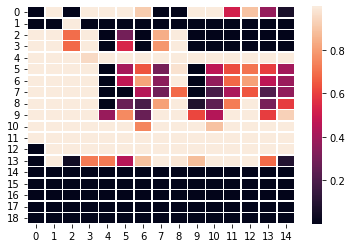

In [62]:
#fig3 = result2[6] # move to cpu first 
ax = sns.heatmap(result2[1], linewidth=0.5)
plt.show()